<a href="https://colab.research.google.com/github/konrado10/NaukaGIT/blob/master/Zad125.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Zad 1

In [1]:
!pip install --upgrade scikit-learn

     |████████████████████████████████| 6.8MB 5.5MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [1]:
import numpy as np
import pandas as pd
import sklearn

In [2]:
data = {
    'size': ['XL', 'L', 'M', 'L', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red'],
    'gender': ['female', 'male', 'male', 'female', 'female'],
    'price': [199.0, 89.0, 99.0, 129.0, 79.0],
    'weight': [500, 450, 300, 380, 410],
    'bought': ['yes', 'no', 'yes', 'no', 'yes']
}

df_raw = pd.DataFrame(data=data)
df_raw

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500,yes
1,L,green,male,89.0,450,no
2,M,blue,male,99.0,300,yes
3,L,green,female,129.0,380,no
4,M,red,female,79.0,410,yes


In [3]:
df = df_raw.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    5 non-null      object 
 1   color   5 non-null      object 
 2   gender  5 non-null      object 
 3   price   5 non-null      float64
 4   weight  5 non-null      int64  
 5   bought  5 non-null      object 
dtypes: float64(1), int64(1), object(4)
memory usage: 368.0+ bytes


In [5]:
for col in ['size', 'color', 'gender', 'bought']:
    df[col] = df[col].astype('category')

df.weight = df.weight.astype('float')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   size    5 non-null      category
 1   color   5 non-null      category
 2   gender  5 non-null      category
 3   price   5 non-null      float64 
 4   weight  5 non-null      float64 
 5   bought  5 non-null      category
dtypes: category(4), float64(2)
memory usage: 628.0 bytes


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,5.0,119.0,48.476799,79.0,89.0,99.0,129.0,199.0
weight,5.0,408.0,75.299402,300.0,380.0,410.0,450.0,500.0


In [9]:
 df.describe(include = 'category')

,size,color,gender,bought
count,5,5,5,5
unique,3,3,2,2
top,M,red,female,yes
freq,2,2,3,3


### LabelEncoder

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()
le.fit(df.bought)
le.transform(df.bought)

array([1, 0, 1, 0, 1])

In [12]:
le.fit_transform(df.bought)

array([1, 0, 1, 0, 1])

In [13]:
le.classes_

array(['no', 'yes'], dtype=object)

In [14]:
df.bought = le.fit_transform(df.bought)
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,1
1,L,green,male,89.0,450.0,0
2,M,blue,male,99.0,300.0,1
3,L,green,female,129.0,380.0,0
4,M,red,female,79.0,410.0,1


In [24]:
df.bought = le.inverse_transform(df.bought)

### OneHotEncoder

In [19]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse = False)
encoder.fit(df[['size']])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [20]:
encoder.transform(df[['size']])

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [21]:
encoder.categories_

[array(['L', 'M', 'XL'], dtype=object)]

In [22]:
encoder = OneHotEncoder(sparse=False, drop = 'first')
encoder.fit(df[['size']])
encoder.transform(df[['size']])

array([[0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.]])

In [25]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,male,99.0,300.0,yes
3,L,green,female,129.0,380.0,no
4,M,red,female,79.0,410.0,yes


## Zad 2

### pd.get_dummies()

In [26]:
pd.get_dummies(df)

,price,weight,size_L,size_M,size_XL,color_blue,color_green,color_red,gender_female,gender_male,bought_no,bought_yes
0,199.0,500.0,0,0,1,0,0,1,1,0,0,1
1,89.0,450.0,1,0,0,0,1,0,0,1,1,0
2,99.0,300.0,0,1,0,1,0,0,0,1,0,1
3,129.0,380.0,1,0,0,0,1,0,1,0,1,0
4,79.0,410.0,0,1,0,0,0,1,1,0,0,1


In [27]:
pd.get_dummies(df, drop_first=True)

,price,weight,size_M,size_XL,color_green,color_red,gender_male,bought_yes
0,199.0,500.0,0,1,0,1,0,1
1,89.0,450.0,0,0,1,0,1,0
2,99.0,300.0,1,0,0,0,1,1
3,129.0,380.0,0,0,1,0,0,0
4,79.0,410.0,1,0,0,1,0,1


In [28]:
pd.get_dummies(df, drop_first=True, prefix='new')

,price,weight,new_M,new_XL,new_green,new_red,new_male,new_yes
0,199.0,500.0,0,1,0,1,0,1
1,89.0,450.0,0,0,1,0,1,0
2,99.0,300.0,1,0,0,0,1,1
3,129.0,380.0,0,0,1,0,0,0
4,79.0,410.0,1,0,0,1,0,1


In [30]:
pd.get_dummies(df, drop_first=True, prefix='new', prefix_sep='-')

,price,weight,new-M,new-XL,new-green,new-red,new-male,new-yes
0,199.0,500.0,0,1,0,1,0,1
1,89.0,450.0,0,0,1,0,1,0
2,99.0,300.0,1,0,0,0,1,1
3,129.0,380.0,0,0,1,0,0,0
4,79.0,410.0,1,0,0,1,0,1


In [32]:
pd.get_dummies(df, drop_first=True, prefix='new', prefix_sep='-', columns = ['size'])

,color,gender,price,weight,bought,new-M,new-XL
0,red,female,199.0,500.0,yes,0,1
1,green,male,89.0,450.0,no,0,0
2,blue,male,99.0,300.0,yes,1,0
3,green,female,129.0,380.0,no,0,0
4,red,female,79.0,410.0,yes,1,0


## Zad 3

### StandardScaler - standaryzacja

std() - pandas nieobciążony \
std() - numpy obciążonmy

In [33]:
def standardize(x):
    return (x - x.mean())/ x.std()

standardize(df.price)

0    1.650274
1   -0.618853
2   -0.412568
3    0.206284
4   -0.825137
Name: price, dtype: float64

In [34]:
from sklearn.preprocessing import scale

scale(df.price)

array([ 1.84506242, -0.69189841, -0.4612656 ,  0.2306328 , -0.92253121])

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(df[['price']])

array([[ 1.84506242],
       [-0.69189841],
       [-0.4612656 ],
       [ 0.2306328 ],
       [-0.92253121]])

In [37]:
scaler = StandardScaler()
df[['price', 'weight']] = scaler.fit_transform(df[['price', 'weight']])

In [38]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,1.845062,1.366002,yes
1,L,green,male,-0.691898,0.623610,no
2,M,blue,male,-0.461266,-1.603567,yes
3,L,green,female,0.230633,-0.415740,no
4,M,red,female,-0.922531,0.029696,yes


In [39]:
le = LabelEncoder()

df.bought = le.fit_transform(df.bought)

scaler = StandardScaler()
df[['price', 'weight']] = scaler.fit_transform(df[['price', 'weight']])

df = pd.get_dummies(df, drop_first=True)
df

,price,weight,bought,size_M,size_XL,color_green,color_red,gender_male
0,1.845062,1.366002,1,0,1,0,1,0
1,-0.691898,0.623610,0,0,0,1,0,1
2,-0.461266,-1.603567,1,1,0,0,0,1
3,0.230633,-0.415740,0,0,0,1,0,0
4,-0.922531,0.029696,1,1,0,0,1,0


## Zad 4

### SimpleImputer

In [1]:
import numpy as np
import pandas as pd
import sklearn

In [2]:
data = {
    'size': ['XL', 'L', 'M', np.nan, 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red'],
    'gender': ['female', 'male', np.nan, 'female', 'female'],
    'price': [199.0, 89.0, np.nan, 129.0, 79.0],
    'weight': [500, 450, np.nan, 380, np.nan],
    'bought': ['yes', 'no', 'yes', 'no', 'yes']
}

df_raw = pd.DataFrame(data=data)
df_raw

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,NaN,yes
3,NaN,green,female,129.0,380.0,no
4,M,red,female,79.0,NaN,yes


In [3]:
df = df_raw.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    4 non-null      object 
 1   color   5 non-null      object 
 2   gender  4 non-null      object 
 3   price   4 non-null      float64
 4   weight  3 non-null      float64
 5   bought  5 non-null      object 
dtypes: float64(2), object(4)
memory usage: 368.0+ bytes


In [6]:
df.isnull()

,size,color,gender,price,weight,bought
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,True,False
3,True,False,False,False,False,False
4,False,False,False,False,True,False


In [7]:
df.isnull().sum()

size      1
color     0
gender    1
price     1
weight    2
bought    0
dtype: int64

In [8]:
df.isnull().sum().sum()

5

In [9]:
df.isnull().sum() / len(df)

size      0.2
color     0.0
gender    0.2
price     0.2
weight    0.4
bought    0.0
dtype: float64

In [10]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values = np.nan, strategy = 'mean')
impute.fit(df[['weight']])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [11]:
impute.statistics_

array([443.33333333])

In [13]:
df[['weight']] = impute.transform(df[['weight']])

In [14]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.000000,yes
1,L,green,male,89.0,450.000000,no
2,M,blue,NaN,NaN,443.333333,yes
3,NaN,green,female,129.0,380.000000,no
4,M,red,female,79.0,443.333333,yes


In [16]:
impute = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value=99.0)
impute.fit_transform(df[['price']])

array([[199.],
       [ 89.],
       [ 99.],
       [129.],
       [ 79.]])

In [17]:
impute = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value='L')
impute.fit_transform(df[['size']])

array([['XL'],
       ['L'],
       ['M'],
       ['L'],
       ['M']], dtype=object)

In [18]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.000000,yes
1,L,green,male,89.0,450.000000,no
2,M,blue,NaN,NaN,443.333333,yes
3,NaN,green,female,129.0,380.000000,no
4,M,red,female,79.0,443.333333,yes


In [19]:
impute = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
impute.fit_transform(df[['size']])

array([['XL'],
       ['L'],
       ['M'],
       ['M'],
       ['M']], dtype=object)

### df.fillna()

In [20]:
df = df_raw.copy()

In [21]:
df[df.weight.isnull()]

,size,color,gender,price,weight,bought
2,M,blue,NaN,NaN,NaN,yes
4,M,red,female,79.0,NaN,yes


In [22]:
df[~df.weight.isnull()]

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
3,NaN,green,female,129.0,380.0,no


In [23]:
df.fillna(value = 'brak')

,size,color,gender,price,weight,bought
0,XL,red,female,199,500,yes
1,L,green,male,89,450,no
2,M,blue,brak,brak,brak,yes
3,brak,green,female,129,380,no
4,M,red,female,79,brak,yes


In [25]:
df['size'].fillna(value = 'L', inplace = True)

### df.dropna()

In [26]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,NaN,yes
3,L,green,female,129.0,380.0,no
4,M,red,female,79.0,NaN,yes


In [27]:
df.dropna()

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
3,L,green,female,129.0,380.0,no


In [28]:
df = df.dropna()

In [29]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
3,L,green,female,129.0,380.0,no


## Zad 5

In [30]:
data = {'price': [108, 109, 110, 110, 109, np.nan, np.nan, 112, 111, 111]}
date_range = pd.date_range(start='01-01-2020 09:00', end='01-01-2020 18:00', periods=10)

df = pd.DataFrame(data=data, index=date_range)
df

,price
2020-01-01 09:00:00,108.0
2020-01-01 10:00:00,109.0
2020-01-01 11:00:00,110.0
2020-01-01 12:00:00,110.0
2020-01-01 13:00:00,109.0
2020-01-01 14:00:00,NaN
2020-01-01 15:00:00,NaN
2020-01-01 16:00:00,112.0
2020-01-01 17:00:00,111.0
2020-01-01 18:00:00,111.0


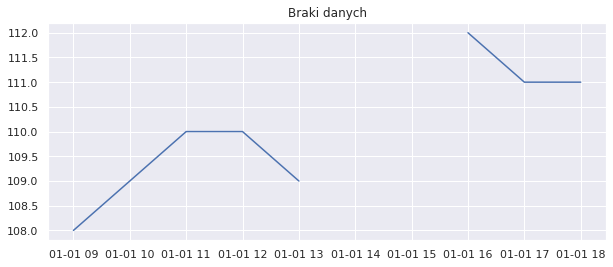

In [31]:
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import seaborn as sns
register_matplotlib_converters()
sns.set()

plt.figure(figsize=(10, 4))
plt.title('Braki danych')
_ = plt.plot(df.price)

In [32]:
import plotly.express as px

df_plotly = df.reset_index()
px.line(df_plotly, 'index', 'price', width=600, height=400, 
        title='Szeregi czasowe - braki danych')

In [33]:
df_plotly = df_plotly.dropna()
px.line(df_plotly, 'index', 'price', width=600, height=400, 
        title='Szeregi czasowe - braki danych')

In [35]:
df_plotly = df.reset_index()
df_plotly = df_plotly.fillna(0)
px.line(df_plotly, 'index', 'price', width=600, height=400, 
        title='Szeregi czasowe - braki danych')

In [36]:
df_plotly = df.reset_index()
df_plotly = df_plotly.fillna(df_plotly.mean())
px.line(df_plotly, 'index', 'price', width=600, height=400, 
        title='Szeregi czasowe - braki danych')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



In [37]:
df_plotly = df.reset_index()
df_plotly = df_plotly.interpolate()
px.line(df_plotly, 'index', 'price', width=600, height=400, 
        title='Szeregi czasowe - braki danych')

In [38]:
df_plotly = df.reset_index()
df_plotly = df_plotly.fillna(method = 'ffill')
px.line(df_plotly, 'index', 'price', width=600, height=400, 
        title='Szeregi czasowe - braki danych')

In [39]:
df_plotly = df.reset_index()
df_plotly = df_plotly.fillna(method = 'bfill')
px.line(df_plotly, 'index', 'price', width=600, height=400, 
        title='Szeregi czasowe - braki danych')

## Zad 6

In [40]:
import numpy as np
import pandas as pd
import sklearn

sklearn.__version__

'0.22.2.post1'

In [41]:
def fetch_financial_data(company='AMZN'):
    """
    This function fetches stock market quotations.
    """
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

df_raw = fetch_financial_data()
df_raw.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-16,3176.01,3247.0000,3163.68,3240.96,4427616
2020-12-15,3181.01,3188.4999,3130.49,3165.12,3323686
2020-12-14,3143.00,3190.4700,3126.00,3156.97,4155794
2020-12-11,3096.66,3118.6700,3072.82,3116.42,3064695
2020-12-10,3088.99,3142.1000,3076.00,3101.49,3030179


In [42]:
df = df_raw.copy()
df = df[:5]
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2020-12-16 to 2020-12-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5 non-null      float64
 1   High    5 non-null      float64
 2   Low     5 non-null      float64
 3   Close   5 non-null      float64
 4   Volume  5 non-null      int64  
dtypes: float64(4), int64(1)
memory usage: 240.0 bytes


In [43]:
df['day'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year

In [44]:
df

,Open,High,Low,Close,Volume,day,month,year
Date,,,,,,,,
2020-12-16,3176.01,3247.0000,3163.68,3240.96,4427616,16,12,2020
2020-12-15,3181.01,3188.4999,3130.49,3165.12,3323686,15,12,2020
2020-12-14,3143.00,3190.4700,3126.00,3156.97,4155794,14,12,2020
2020-12-11,3096.66,3118.6700,3072.82,3116.42,3064695,11,12,2020
2020-12-10,3088.99,3142.1000,3076.00,3101.49,3030179,10,12,2020


In [45]:
df = pd.DataFrame(data={'height': [175., 178.5, 185., 191., 184.5, 183., 168.]})
df

,height
0,175.0
1,178.5
2,185.0
3,191.0
4,184.5
5,183.0
6,168.0


In [46]:
df['height_cut'] = pd.cut(x = df.height, bins = 3)

In [47]:
df

,height,height_cut
0,175.0,"(167.977, 175.667]"
1,178.5,"(175.667, 183.333]"
2,185.0,"(183.333, 191.0]"
3,191.0,"(183.333, 191.0]"
4,184.5,"(183.333, 191.0]"
5,183.0,"(175.667, 183.333]"
6,168.0,"(167.977, 175.667]"


In [48]:
df['height_cut2'] = pd.cut(x = df.height, bins = 3, labels=['small', 'medium', 'high'])

In [49]:
df

,height,height_cut,height_cut2
0,175.0,"(167.977, 175.667]",small
1,178.5,"(175.667, 183.333]",medium
2,185.0,"(183.333, 191.0]",high
3,191.0,"(183.333, 191.0]",high
4,184.5,"(183.333, 191.0]",high
5,183.0,"(175.667, 183.333]",medium
6,168.0,"(167.977, 175.667]",small


In [51]:
pd.get_dummies(data = df.height_cut2, drop_first=True, prefix = 'height')

,height_medium,height_high
0,0,0
1,1,0
2,0,1
3,0,1
4,0,1
5,1,0
6,0,0


In [52]:
df = pd.DataFrame(data={'lang': [['PL', 'ENG'], ['GER', 'ENG', 'PL', 'FRA'], ['RUS']]})
df

,lang
0,"[PL, ENG]"
1,"[GER, ENG, PL, FRA]"
2,[RUS]


In [54]:
df['lang_len'] = df.lang.apply(len)
df

,lang,lang_len
0,"[PL, ENG]",2
1,"[GER, ENG, PL, FRA]",4
2,[RUS],1


In [55]:
df['PL_flag'] = df.lang.apply(lambda x: 1 if 'PL' in x else 0)
df

,lang,lang_len,PL_flag
0,"[PL, ENG]",2,1
1,"[GER, ENG, PL, FRA]",4,1
2,[RUS],1,0


In [56]:
df = pd.DataFrame(data={'website': ['wp.pl', 'onet.pl', 'google.com']})
df

,website
0,wp.pl
1,onet.pl
2,google.com


In [58]:
df.website.str.split('.', expand = True)

,0,1
0,wp,pl
1,onet,pl
2,google,com


## Zad 7

In [59]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns

np.random.seed(42)
np.set_printoptions(edgeitems=30, linewidth=100000, 
                    formatter=dict(float=lambda x: f'{x:.2f}'))
sns.set()
sklearn.__version__

'0.22.2.post1'

In [60]:
from sklearn.datasets import load_iris

raw_data = load_iris()
raw_data_copy = raw_data.copy()
raw_data_copy.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [62]:
print(raw_data_copy['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### Przygotowanie danych

In [63]:
data = raw_data_copy['data']
target = raw_data_copy['target']

print(f'{data[:5]}\n')
print(target[:5])

[[5.10 3.50 1.40 0.20]
 [4.90 3.00 1.40 0.20]
 [4.70 3.20 1.30 0.20]
 [4.60 3.10 1.50 0.20]
 [5.00 3.60 1.40 0.20]]

[0 0 0 0 0]


In [67]:
all_data = np.c_[data,target]

In [68]:
df = pd.DataFrame(data = all_data, columns=raw_data.feature_names + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [72]:
df.describe().T.apply(lambda x: round(x,2))

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.84,0.83,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.06,0.44,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.76,1.77,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.20,0.76,0.1,0.3,1.30,1.8,2.5
target,150.0,1.00,0.82,0.0,0.0,1.00,2.0,2.0


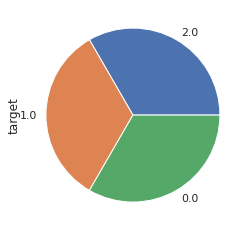

In [74]:
df.target.value_counts().plot(kind = 'pie')

In [75]:
data = df.copy()
target = data.pop('target')
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [76]:
target.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state = 42)

print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')
print(f'\nTest ratio: {len(X_test) / len(data):.2f}')
print(f'\ny_train:\n{y_train.value_counts()}')
print(f'\ny_test:\n{y_test.value_counts()}')

X_train shape (112, 4)
y_train shape (112,)
X_test shape (38, 4)
y_test shape (38,)

Test ratio: 0.25

y_train:
1.0    39
2.0    38
0.0    35
Name: target, dtype: int64

y_test:
0.0    15
2.0    12
1.0    11
Name: target, dtype: int64


In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state = 42, test_size = 0.3)

print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')
print(f'\nTest ratio: {len(X_test) / len(data):.2f}')
print(f'\ny_train:\n{y_train.value_counts()}')
print(f'\ny_test:\n{y_test.value_counts()}')

X_train shape (105, 4)
y_train shape (105,)
X_test shape (45, 4)
y_test shape (45,)

Test ratio: 0.30

y_train:
2.0    37
1.0    37
0.0    31
Name: target, dtype: int64

y_test:
0.0    19
2.0    13
1.0    13
Name: target, dtype: int64


In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state = 42, train_size = 0.8)

print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')
print(f'\nTest ratio: {len(X_test) / len(data):.2f}')
print(f'\ny_train:\n{y_train.value_counts()}')
print(f'\ny_test:\n{y_test.value_counts()}')

X_train shape (120, 4)
y_train shape (120,)
X_test shape (30, 4)
y_test shape (30,)

Test ratio: 0.20

y_train:
1.0    41
0.0    40
2.0    39
Name: target, dtype: int64

y_test:
2.0    11
0.0    10
1.0     9
Name: target, dtype: int64


In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state = 42, train_size = 0.8, stratify = target)

print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')
print(f'\nTest ratio: {len(X_test) / len(data):.2f}')
print(f'\ny_train:\n{y_train.value_counts()}')
print(f'\ny_test:\n{y_test.value_counts()}')

X_train shape (120, 4)
y_train shape (120,)
X_test shape (30, 4)
y_test shape (30,)

Test ratio: 0.20

y_train:
1.0    40
2.0    40
0.0    40
Name: target, dtype: int64

y_test:
1.0    10
2.0    10
0.0    10
Name: target, dtype: int64


In [81]:

from sklearn.datasets import load_breast_cancer

raw_data = load_breast_cancer()
raw_data_copy = raw_data.copy()
raw_data_copy.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [82]:
print(raw_data_copy['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [83]:
data = raw_data_copy['data']
target = raw_data_copy['target']

print(f'{data[:5]}\n')
print(target[:5])

[[17.99 10.38 122.80 1001.00 0.12 0.28 0.30 0.15 0.24 0.08 1.09 0.91 8.59 153.40 0.01 0.05 0.05 0.02 0.03 0.01 25.38 17.33 184.60 2019.00 0.16 0.67 0.71 0.27 0.46 0.12]
 [20.57 17.77 132.90 1326.00 0.08 0.08 0.09 0.07 0.18 0.06 0.54 0.73 3.40 74.08 0.01 0.01 0.02 0.01 0.01 0.00 24.99 23.41 158.80 1956.00 0.12 0.19 0.24 0.19 0.28 0.09]
 [19.69 21.25 130.00 1203.00 0.11 0.16 0.20 0.13 0.21 0.06 0.75 0.79 4.58 94.03 0.01 0.04 0.04 0.02 0.02 0.00 23.57 25.53 152.50 1709.00 0.14 0.42 0.45 0.24 0.36 0.09]
 [11.42 20.38 77.58 386.10 0.14 0.28 0.24 0.11 0.26 0.10 0.50 1.16 3.44 27.23 0.01 0.07 0.06 0.02 0.06 0.01 14.91 26.50 98.87 567.70 0.21 0.87 0.69 0.26 0.66 0.17]
 [20.29 14.34 135.10 1297.00 0.10 0.13 0.20 0.10 0.18 0.06 0.76 0.78 5.44 94.44 0.01 0.02 0.06 0.02 0.02 0.01 22.54 16.67 152.20 1575.00 0.14 0.20 0.40 0.16 0.24 0.08]]

[0 0 0 0 0]


In [84]:
all_data = np.c_[data, target]
all_data[:5]

array([[17.99, 10.38, 122.80, 1001.00, 0.12, 0.28, 0.30, 0.15, 0.24, 0.08, 1.09, 0.91, 8.59, 153.40, 0.01, 0.05, 0.05, 0.02, 0.03, 0.01, 25.38, 17.33, 184.60, 2019.00, 0.16, 0.67, 0.71, 0.27, 0.46, 0.12, 0.00],
       [20.57, 17.77, 132.90, 1326.00, 0.08, 0.08, 0.09, 0.07, 0.18, 0.06, 0.54, 0.73, 3.40, 74.08, 0.01, 0.01, 0.02, 0.01, 0.01, 0.00, 24.99, 23.41, 158.80, 1956.00, 0.12, 0.19, 0.24, 0.19, 0.28, 0.09, 0.00],
       [19.69, 21.25, 130.00, 1203.00, 0.11, 0.16, 0.20, 0.13, 0.21, 0.06, 0.75, 0.79, 4.58, 94.03, 0.01, 0.04, 0.04, 0.02, 0.02, 0.00, 23.57, 25.53, 152.50, 1709.00, 0.14, 0.42, 0.45, 0.24, 0.36, 0.09, 0.00],
       [11.42, 20.38, 77.58, 386.10, 0.14, 0.28, 0.24, 0.11, 0.26, 0.10, 0.50, 1.16, 3.44, 27.23, 0.01, 0.07, 0.06, 0.02, 0.06, 0.01, 14.91, 26.50, 98.87, 567.70, 0.21, 0.87, 0.69, 0.26, 0.66, 0.17, 0.00],
       [20.29, 14.34, 135.10, 1297.00, 0.10, 0.13, 0.20, 0.10, 0.18, 0.06, 0.76, 0.78, 5.44, 94.44, 0.01, 0.02, 0.06, 0.02, 0.02, 0.01, 22.54, 16.67, 152.20, 1575.

In [85]:
df = pd.DataFrame(data=all_data, columns=list(raw_data['feature_names']) + ['target'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [86]:
data = df.copy()
target = data.pop('target')
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [87]:
target.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=40, test_size=0.25)

print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')
print(f'\nTest ratio: {len(X_test) / len(data):.2f}')
print(f'\ntarget:\n{target.value_counts() / len(target)}')
print(f'\ny_train:\n{y_train.value_counts() / len(y_train)}')
print(f'\ny_test:\n{y_test.value_counts() / len(y_test)}')

X_train shape (426, 30)
y_train shape (426,)
X_test shape (143, 30)
y_test shape (143,)

Test ratio: 0.25

target:
1.0    0.627417
0.0    0.372583
Name: target, dtype: float64

y_train:
1.0    0.607981
0.0    0.392019
Name: target, dtype: float64

y_test:
1.0    0.685315
0.0    0.314685
Name: target, dtype: float64


In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=40, test_size=0.25, stratify = target)

print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')
print(f'\nTest ratio: {len(X_test) / len(data):.2f}')
print(f'\ntarget:\n{target.value_counts() / len(target)}')
print(f'\ny_train:\n{y_train.value_counts() / len(y_train)}')
print(f'\ny_test:\n{y_test.value_counts() / len(y_test)}')

X_train shape (426, 30)
y_train shape (426,)
X_test shape (143, 30)
y_test shape (143,)

Test ratio: 0.25

target:
1.0    0.627417
0.0    0.372583
Name: target, dtype: float64

y_train:
1.0    0.626761
0.0    0.373239
Name: target, dtype: float64

y_test:
1.0    0.629371
0.0    0.370629
Name: target, dtype: float64


# Regresja liniowa 

## Zad 8

In [92]:
import numpy as np

In [93]:

X1 = np.array([1, 2, 3, 4, 5, 6])
Y = np.array([3000, 3250, 3500, 3750, 4000, 4250])
m = len(X1)

print(f'Lata pracy: {X1}')
print(f'Wynagrodzenie: {Y}')
print(f'Liczba próbek: {m}')

Lata pracy: [1 2 3 4 5 6]
Wynagrodzenie: [3000 3250 3500 3750 4000 4250]
Liczba próbek: 6


In [95]:
X1 = X1.reshape((m,1))
X1

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [96]:
bias = np.ones((m,1))
print(bias)

[[1.00]
 [1.00]
 [1.00]
 [1.00]
 [1.00]
 [1.00]]


In [97]:
X = np.append(bias, X1, axis = 1)
print(X)

[[1.00 1.00]
 [1.00 2.00]
 [1.00 3.00]
 [1.00 4.00]
 [1.00 5.00]
 [1.00 6.00]]


In [98]:
np.dot(X.T, X)

array([[6.00, 21.00],
       [21.00, 91.00]])

In [99]:
L = np.linalg.inv(np.dot(X.T, X))
L

array([[0.87, -0.20],
       [-0.20, 0.06]])

In [100]:
P = np.dot(X.T, Y)
P

array([21750.00, 80500.00])

In [101]:
np.dot(L,P)

array([2750.00, 250.00])

In [102]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

regression.fit(X1,Y)

print(regression.intercept_)
print(regression.coef_[0])

2750.0
250.0


## Zad 9

In [103]:
import numpy as np
import pandas as pd
import plotly.express as px

np.random.seed(42)

In [104]:
X1 = np.array([1, 2, 3, 4, 5, 6])
Y = np.array([3000, 3250, 3500, 3750, 4000, 4250])
m = len(X1)

print(f'Lata pracy: {X1}')
print(f'Wynagrodzenie: {Y}')
print(f'Liczba próbek: {m}')

Lata pracy: [1 2 3 4 5 6]
Wynagrodzenie: [3000 3250 3500 3750 4000 4250]
Liczba próbek: 6


In [105]:
X1 = X1.reshape(m, 1)
Y = Y.reshape(-1, 1)
print(X1)
print(X1.shape)

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
(6, 1)


In [106]:
bias = np.ones((m,1))
print(bias)

[[1.00]
 [1.00]
 [1.00]
 [1.00]
 [1.00]
 [1.00]]


In [107]:
X = np.append(bias, X1, axis = 1)
print(X)

[[1.00 1.00]
 [1.00 2.00]
 [1.00 3.00]
 [1.00 4.00]
 [1.00 5.00]
 [1.00 6.00]]


### Losowa inicjalizacja parametrów

In [116]:
eta = 0.01

weights = np.random.randn(2,1)
print(X)
print(weights)

[[1.00 1.00]
 [1.00 2.00]
 [1.00 3.00]
 [1.00 4.00]
 [1.00 5.00]
 [1.00 6.00]]
[[0.65]
 [1.52]]


### Metoda gradientu prostego

In [117]:
intercept = []
coef = []

for i in range(5000):
    gradients = (2/m) * X.T.dot(X.dot(weights)-Y)
    weights = weights - eta * gradients
    intercept.append(weights[0][0])
    coef.append(weights[1][0])

print(weights)

[[2750.00]
 [250.00]]


In [118]:
df = pd.DataFrame(data = {'intercept': intercept, 'coef': coef})
df.head()

,intercept,coef
0,73.028123,269.349039
1,125.213127,450.867862
2,163.648115,573.673025
3,192.718041,656.536839
4,215.406101,712.230402


In [120]:
import plotly.express as px

px.line(data_frame=df, x = df.index, y = df.intercept, title = 'Dopasowanie: intercept')

In [121]:
px.line(data_frame=df, x = df.index, y = df.coef, title = 'Dopasowanie: coef')

## Zad 10

In [122]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
np.set_printoptions(precision=6, suppress=True, edgeitems=30, linewidth=120, 
                    formatter=dict(float=lambda x: f'{x:.2f}'))
sns.set(font_scale=1.3)
sklearn.__version__

'0.22.2.post1'

In [124]:
from sklearn.datasets import make_regression

data, target = make_regression(n_samples = 100, n_features = 1, n_targets = 1, noise = 30.0, random_state =42)

data.shape

(100, 1)

In [125]:
target.shape

(100,)

In [126]:
data[:5]

array([[0.93],
       [0.09],
       [-1.06],
       [0.31],
       [-0.48]])

In [127]:
target[:5]

array([74.59, -37.46, -16.46, 5.35, -13.21])

[]

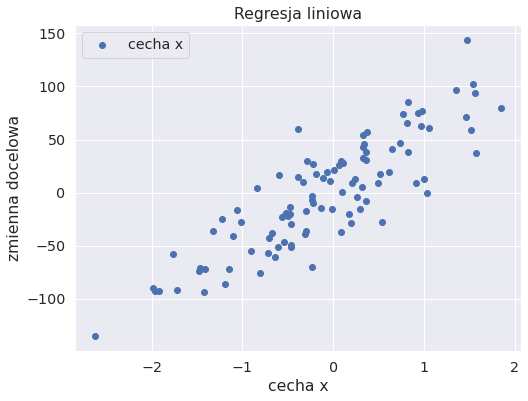

In [128]:
plt.figure(figsize=(8,6))
plt.title('Regresja liniowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(data, target, label = 'cecha x')
plt.legend()
plt.plot()

In [129]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(data, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [130]:
regressor.score(data,target)

0.7426670084336404

In [131]:
y_pred = regressor.predict(data)
y_pred

array([49.90, 7.83, -49.21, 19.15, -20.38, 35.77, -19.60, 30.53, 33.97, 53.50, 44.45, 80.13, 40.29, -7.45, -36.79,
       8.07, -94.15, 29.07, 54.87, -127.04, 28.25, 8.33, -19.71, 49.11, 81.46, 76.53, -26.43, 1.71, -26.49, -56.11,
       21.29, 22.22, 16.50, -22.90, -41.75, 13.30, -11.40, 21.52, 44.48, -11.04, 21.50, -30.24, 79.39, -22.33, -8.17,
       -16.04, -11.51, -28.65, 19.88, 13.90, -12.83, 3.75, -8.17, 77.14, -15.69, 20.62, 20.00, -5.76, -8.19, -95.54,
       19.64, -7.75, -51.63, -31.49, -69.43, 51.76, -82.46, -91.84, -24.52, 41.74, 43.98, -66.88, -70.18, -57.34,
       -38.32, 82.19, 52.11, 15.55, 18.25, -23.63, -84.36, 9.02, 12.03, -62.69, 56.17, -2.27, -19.90, 2.82, -46.97,
       -3.39, -53.86, 71.08, 6.86, -21.51, -19.46, 95.79, -67.50, -32.37, -0.09, -11.91])

[]

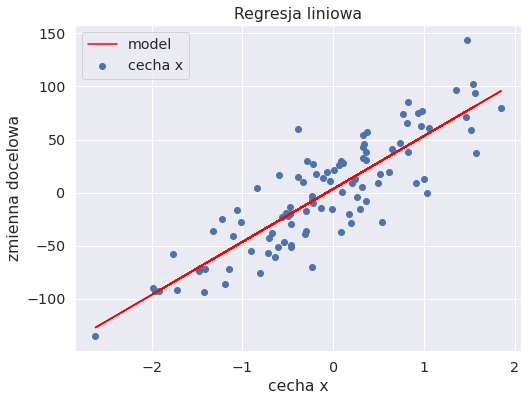

In [132]:
plt.figure(figsize=(8,6))
plt.title('Regresja liniowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(data, target, label = 'cecha x')
plt.plot(data, y_pred, color = 'red', label = 'model')
plt.legend()
plt.plot()

In [135]:
[item for item in dir(regressor) if not item.startswith('_')]

['coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [136]:
regressor.coef_

array([49.83])

In [137]:
regressor.intercept_

3.4953459615809175

[]

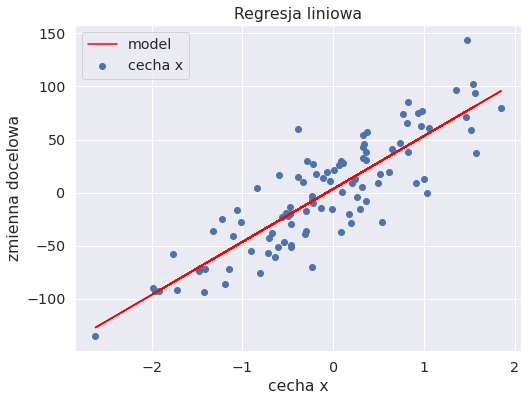

In [138]:
plt.figure(figsize=(8,6))
plt.title('Regresja liniowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(data, target, label = 'cecha x')
plt.plot(data, regressor.intercept_ + regressor.coef_[0]*data, color = 'red', label = 'model')
plt.legend()
plt.plot()

## Zad 11

In [139]:
from sklearn.datasets import make_regression

data, target = make_regression(n_samples = 1000, n_features = 1, n_targets = 1, noise = 15.0, random_state =42)

data.shape

(1000, 1)

In [140]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_train shape: {y_train.shape}')

X_train shape: (750, 1)
X_test shape: (250, 1)
y_train shape: (750,)
y_train shape: (750,)


[]

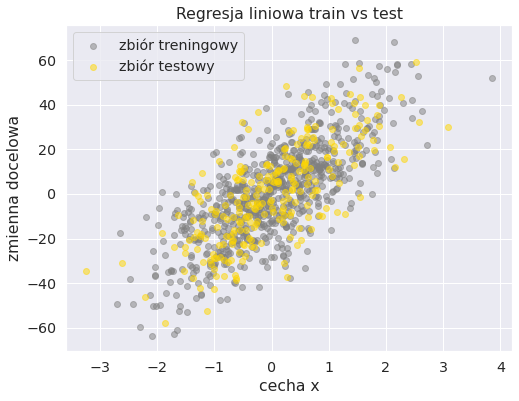

In [141]:
plt.figure(figsize=(8,6))
plt.title('Regresja liniowa train vs test')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X_train, y_train, label = 'zbiór treningowy', color = 'gray', alpha = 0.5)
plt.scatter(X_test, y_test, label = 'zbiór testowy', color = 'gold', alpha = 0.5)
plt.legend()
plt.plot()

In [142]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [143]:
regressor.score(X_train,y_train)

0.5550440098049001

In [144]:
regressor.score(X_test, y_test)

0.5108438585354155

[]

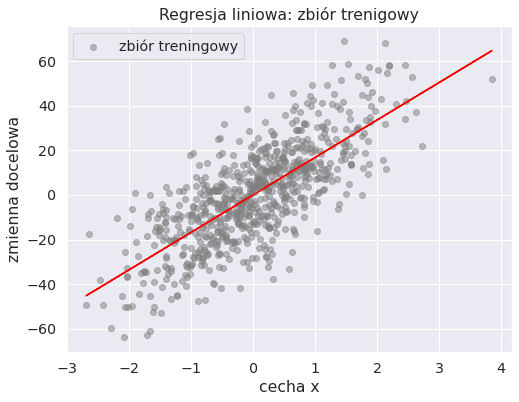

In [145]:
plt.figure(figsize=(8,6))
plt.title('Regresja liniowa: zbiór trenigowy')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X_train, y_train, label = 'zbiór treningowy', color = 'gray', alpha = 0.5)
plt.plot(X_train, regressor.intercept_ + regressor.coef_[0]*X_train, color = 'red')
plt.legend()
plt.plot()

[]

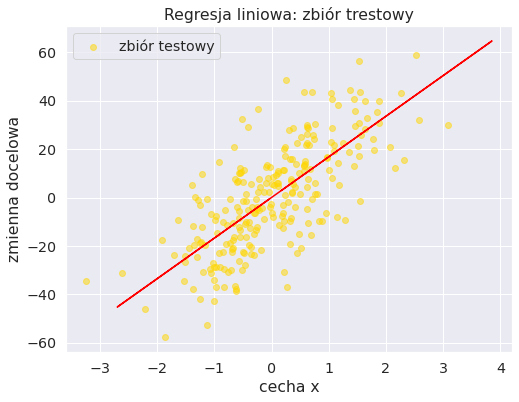

In [146]:
plt.figure(figsize=(8,6))
plt.title('Regresja liniowa: zbiór trestowy')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X_test, y_test, label = 'zbiór testowy', color = 'gold', alpha = 0.5)
plt.plot(X_train, regressor.intercept_ + regressor.coef_[0]*X_train, color = 'red')
plt.legend()
plt.plot()

In [148]:
y_pred = regressor.predict(X_test)

predictions = pd.DataFrame(data = {'y_true': y_test, 'y_pred': y_pred})
predictions.head()

,y_true,y_pred
0,30.876983,25.601338
1,1.850537,5.954600
2,30.604981,31.624589
3,-9.092543,-16.490844
4,-36.311708,-10.800495


In [149]:
predictions['error']  = predictions.y_true - predictions.y_pred
predictions.head()

,y_true,y_pred,error
0,30.876983,25.601338,5.275646
1,1.850537,5.954600,-4.104063
2,30.604981,31.624589,-1.019608
3,-9.092543,-16.490844,7.398301
4,-36.311708,-10.800495,-25.511212


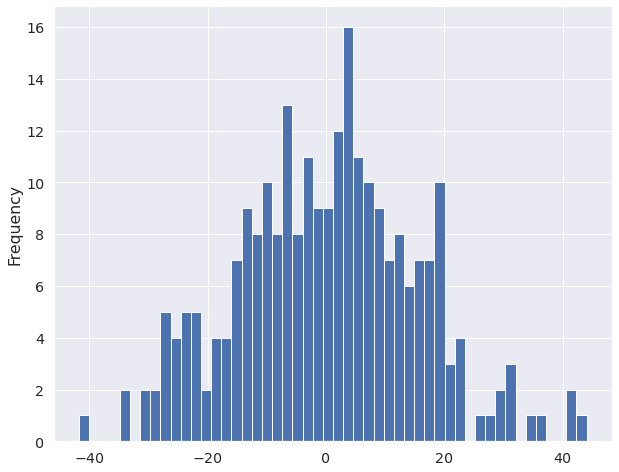

In [152]:
predictions.error.plot(kind = 'hist', bins = 50, figsize = (10,8))

## Zad 12

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

sns.set()
np.random.seed(42)
np.set_printoptions(precision=4, suppress=True)
sklearn.__version__

'0.22.2.post1'

In [2]:
df_raw = pd.read_csv('https://storage.googleapis.com/esmartdata-courses-files/ml-course/insurance.csv')
df_raw.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df = df_raw.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [6]:
df[df.charges == 1639.5631]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [27]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1337 non-null   int64   
 1   sex       1337 non-null   category
 2   bmi       1337 non-null   float64 
 3   children  1337 non-null   int64   
 4   smoker    1337 non-null   category
 5   region    1337 non-null   category
 6   charges   1337 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 56.5 KB


In [28]:
cat_cols = [col for col in df.columns if df[col].dtype == 'O']

In [29]:
cat_cols

[]

In [30]:
for col in cat_cols:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1337 non-null   int64   
 1   sex       1337 non-null   category
 2   bmi       1337 non-null   float64 
 3   children  1337 non-null   int64   
 4   smoker    1337 non-null   category
 5   region    1337 non-null   category
 6   charges   1337 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 56.5 KB


In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


In [32]:
df.describe(include = ['category']).T

,count,unique,top,freq
sex,1337,2,male,675
smoker,1337,2,no,1063
region,1337,4,southeast,364


In [33]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [34]:
import plotly.express as px

px.histogram(df, x = 'charges', width = 800, height = 600, nbins = 60, facet_col = 'smoker', facet_row = 'sex')

In [35]:
px.histogram(df, x = 'smoker', facet_col = 'sex', color = 'sex', width=800, height=600)

In [36]:
df_dummiess = pd.get_dummies(df, drop_first=True)

In [37]:
df_dummiess

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [38]:
corr = df_dummiess.corr()

In [39]:
corr

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109344,0.041536,0.298308,-0.019814,-0.025587,0.001495,-0.012311,0.009415
bmi,0.109344,1.000000,0.012755,0.198401,0.046397,0.003746,-0.136138,0.270057,-0.006211
children,0.041536,0.012755,1.000000,0.067389,0.017848,0.007331,0.026044,-0.023492,0.021538
charges,0.298308,0.198401,0.067389,1.000000,0.058044,0.787234,-0.038695,0.073578,-0.043637
sex_male,-0.019814,0.046397,0.017848,0.058044,1.000000,0.076596,-0.012482,0.017578,-0.003767
smoker_yes,-0.025587,0.003746,0.007331,0.787234,0.076596,1.000000,-0.036321,0.068282,-0.037168
region_northwest,0.001495,-0.136138,0.026044,-0.038695,-0.012482,-0.036321,1.000000,-0.345909,-0.320493
region_southeast,-0.012311,0.270057,-0.023492,0.073578,0.017578,0.068282,-0.345909,1.000000,-0.346614
region_southwest,0.009415,-0.006211,0.021538,-0.043637,-0.003767,-0.037168,-0.320493,-0.346614,1.000000


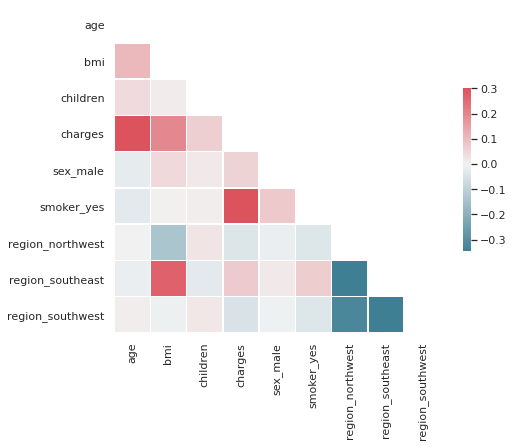

In [40]:

sns.set(style="white")
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [41]:
df_dummiess.corr()['charges'].sort_values()

region_southwest   -0.043637
region_northwest   -0.038695
sex_male            0.058044
children            0.067389
region_southeast    0.073578
bmi                 0.198401
age                 0.298308
smoker_yes          0.787234
charges             1.000000
Name: charges, dtype: float64

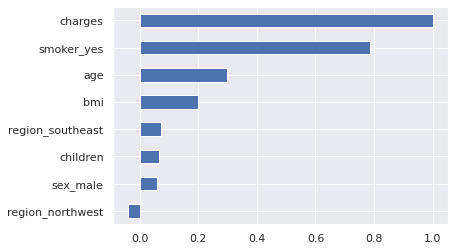

In [42]:
sns.set()
df_dummiess.corr()['charges'].sort_values()[1:].plot(kind = 'barh')

In [43]:
data = df_dummiess.copy()
target = data.pop('charges')
data.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [44]:
target.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2)

X_train.shape

(1069, 8)

In [46]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
regressor.score(X_test, y_test)

0.7548453637216472

In [48]:
y_pred = regressor.predict(X_test)
y_pred[:10]

array([ 3455.0041, 15134.1366, 10675.8978,  7717.1621,  9531.2407,
        5054.2871,  7345.5765,  3496.9439, 13396.6196, 29870.0655])

In [49]:
y_true = y_test.copy()
predictions = pd.DataFrame(data = {'y_true': y_true, 'y_pred': y_pred})
predictions['error'] = predictions.y_true - predictions.y_pred
predictions.head()

,y_true,y_pred,error
274,2523.16950,3455.004073,-931.834573
264,20462.99766,15134.136599,5328.861061
368,8116.26885,10675.897761,-2559.628911
535,6067.12675,7717.162058,-1650.035308
1159,3989.84100,9531.240666,-5541.399666


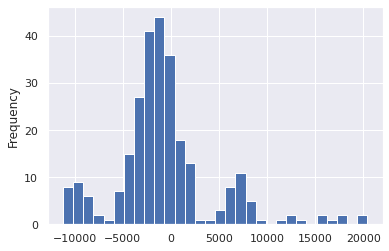

In [51]:
predictions.error.plot(kind = 'hist', bins = 30)

In [52]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_true, y_pred)

In [53]:
mae

3780.4288595122207

In [54]:
regressor.intercept_

-11791.808288208733

In [55]:
regressor.coef_

array([  253.0694,   346.4318,   432.8785,  -249.2973, 23946.1897,
        -374.8222,  -970.5642, -1013.52  ])

In [56]:
data.columns

Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

### Dobór cech - eliminacja wsteczna

In [58]:
import statsmodels.api as sm

X_train_ols = X_train.copy()
X_train_ols = X_train_ols.values
X_train_ols = sm.add_constant(X_train_ols)
X_train_ols

array([[ 1.  , 42.  , 35.97, ...,  0.  ,  1.  ,  0.  ],
       [ 1.  , 20.  , 33.  , ...,  0.  ,  0.  ,  1.  ],
       [ 1.  , 54.  , 31.9 , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [ 1.  , 50.  , 32.3 , ...,  0.  ,  0.  ,  0.  ],
       [ 1.  , 41.  , 37.1 , ...,  0.  ,  0.  ,  1.  ],
       [ 1.  , 62.  , 26.29, ...,  0.  ,  1.  ,  0.  ]])

In [59]:
ols = sm.OLS(endog=y_train, exog=X_train_ols).fit()
predictors = ['const'] + list(X_train.columns)
print(ols.summary(xname=predictors))

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     394.1
Date:                Fri, 18 Dec 2020   Prob (F-statistic):          2.54e-311
Time:                        21:04:53   Log-Likelihood:                -10852.
No. Observations:                1069   AIC:                         2.172e+04
Df Residuals:                    1060   BIC:                         2.177e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.179e+04   1121.856  

In [60]:
X_selected = X_train_ols[:,[0,1,2,3,5,6,7,8]]
predictors.remove('sex_male')

ols = sm.OLS(endog=y_train, exog = X_selected).fit()
print(ols.summary(xname=predictors))

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     450.6
Date:                Fri, 18 Dec 2020   Prob (F-statistic):          1.42e-312
Time:                        21:09:17   Log-Likelihood:                -10852.
No. Observations:                1069   AIC:                         2.172e+04
Df Residuals:                    1061   BIC:                         2.176e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.189e+04   1110.336  

In [61]:
X_selected = X_train_ols[:,[0,1,2,3,5, 7,8]]
predictors.remove('region_northwest')

ols = sm.OLS(endog=y_train, exog = X_selected).fit()
print(ols.summary(xname=predictors))

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     525.9
Date:                Fri, 18 Dec 2020   Prob (F-statistic):          7.51e-314
Time:                        21:10:35   Log-Likelihood:                -10852.
No. Observations:                1069   AIC:                         2.172e+04
Df Residuals:                    1062   BIC:                         2.175e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.207e+04   1079.685  

In [63]:
X_selected = X_train_ols[:,[0,1,2,3,5, 7]]
predictors.remove('region_southeast')

ols = sm.OLS(endog=y_train, exog = X_selected).fit()
print(ols.summary(xname=predictors))

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     629.3
Date:                Fri, 18 Dec 2020   Prob (F-statistic):          1.24e-314
Time:                        21:11:36   Log-Likelihood:                -10853.
No. Observations:                1069   AIC:                         2.172e+04
Df Residuals:                    1063   BIC:                         2.175e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.219e+04   1078.430  

In [64]:
X_selected = X_train_ols[:,[0,1,2,3,5]]
predictors.remove('region_southwest')

ols = sm.OLS(endog=y_train, exog = X_selected).fit()
print(ols.summary(xname=predictors))

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     786.1
Date:                Fri, 18 Dec 2020   Prob (F-statistic):          7.86e-316
Time:                        21:12:24   Log-Likelihood:                -10854.
No. Observations:                1069   AIC:                         2.172e+04
Df Residuals:                    1064   BIC:                         2.174e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.204e+04   1070.331    -11.249      0.0

In [65]:
X_selected = X_train_ols[:,[0,1,2,5]]
predictors.remove('children')

ols = sm.OLS(endog=y_train, exog = X_selected).fit()
print(ols.summary(xname=predictors))

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1040.
Date:                Fri, 18 Dec 2020   Prob (F-statistic):          8.29e-316
Time:                        21:13:01   Log-Likelihood:                -10858.
No. Observations:                1069   AIC:                         2.172e+04
Df Residuals:                    1065   BIC:                         2.174e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.163e+04   1062.634    -10.946      0.0

In [66]:
X_train_numpy = X_train.values
X_train_numpy = sm.add_constant(X_train_numpy)
num_vars = len(X_train_numpy[0])

predictors = ['const'] + list(X_train.columns)
sl = 0.05

for i in range(0, num_vars):
    ols = sm.OLS(endog=y_train, exog=X_train_numpy).fit()
    max_pval = max(ols.pvalues.astype('float'))
    if max_pval > sl:
        for j in range(0, num_vars - i):
            if ols.pvalues[j].astype('float') == max_pval:
                X_train_numpy = np.delete(X_train_numpy, j, axis=1)
                predictors.remove(predictors[j])

print(ols.summary(xname=predictors))

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     786.1
Date:                Fri, 18 Dec 2020   Prob (F-statistic):          7.86e-316
Time:                        21:30:55   Log-Likelihood:                -10854.
No. Observations:                1069   AIC:                         2.172e+04
Df Residuals:                    1064   BIC:                         2.174e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.204e+04   1070.331    -11.249      0.0

In [67]:
ols.save('model.pickle')

In [69]:
X_train_numpy[0]

array([ 1.  , 42.  , 35.97,  2.  ,  0.  ])